# Problema 12-14
Heat treating is often used to carburize metal parts 
such as gears. The thickness of the carburized layer is consid
ered a crucial feature of the gear and contributes to the overall 
reliability of the part. Because of the critical nature of this fea
ture, two different lab tests are performed on each furnace load. 
One test is run on a sample pin that accompanies each load. 
The other test is a destructive test that cross-sections an actual 
part. This test involves running a carbon analysis on the surface 
of both the gear pitch (top of the gear tooth) and the gear root 
(between the gear teeth). Table E12-6 shows the results of the 
pitch carbon analysis test for 32 parts.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import itertools
%matplotlib inline

In [2]:
df = pd.read_excel('table 12-6.xlsx')
df.head()

,TEMP,SOAKTIME,SOAKPCT,DIFFTIME,DIFFPCT,PITCH
0,1650,0.58,1.10,0.25,0.90,0.013
1,1650,0.66,1.10,0.33,0.90,0.016
2,1650,0.66,1.10,0.33,0.90,0.015
3,1650,0.66,1.10,0.33,0.95,0.016
4,1600,0.66,1.15,0.33,1.00,0.015


In [3]:
modelo = smf.ols('PITCH ~ TEMP + SOAKTIME + SOAKPCT + DIFFTIME + DIFFPCT', data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PITCH   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     162.4
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           9.54e-19
Time:                        13:02:44   Log-Likelihood:                 152.70
No. Observations:                  32   AIC:                            -293.4
Df Residuals:                      26   BIC:                            -284.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0784      0.074     -1.065      0.297      -0.230       0.073
TEMP        4.392e-05   3.63e-05      1.211      0.237   -3.06e-05       0.000
SOAKTIME       0.0025      0.000     11.787      0.000       0.002       0.003
SOAKPCT        0.0183      0.020      0.911      0.371      -0.023       0.060
DIFFTIME       0.0078      0.001      5.770      0.000       0.005       0.011
DIFFPCT       -0.0031      0.008     -0.389      0.700      -0.020       0.013
==============================================================================
Omnibus:                        5.565   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.135
Skew:                           0.601   Prob(JB):                        0.126
Kurtosis:                       4.288   Cond. No.                     3.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$\hat{y}=-0.0784+4.392\times10^{-5}x_1+0.0025x_2+0.0183x_3+0.0078x_4-0.0031x_5$$

## Análisis de residuos

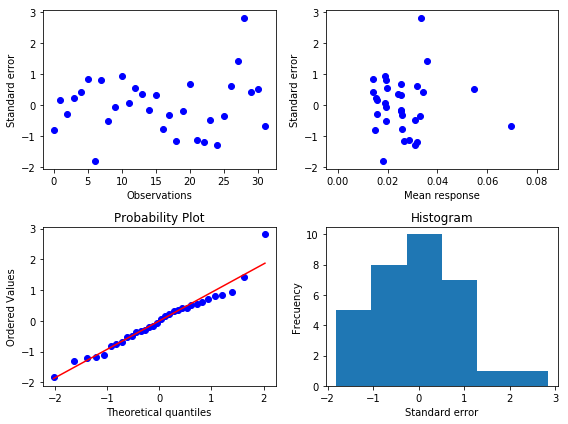

In [4]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df.index, resultado.resid_pearson, color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(resultado.resid_pearson, bins=6)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()

## Estimar una predicción

In [5]:
predic = resultado.get_prediction(exog={'TEMP': 1650,
                                        'SOAKTIME': 1.00,
                                        'SOAKPCT': 1.10,
                                        'DIFFTIME': 1.00,
                                        'DIFFPCT': 0.80})
predic.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.022009,0.000671,0.020629,0.023389,0.017139,0.026878


## Selección de variables

In [6]:
all_vars = ['TEMP', 'SOAKTIME', 'SOAKPCT', 'DIFFTIME', 'DIFFPCT']
modelos = []
for k in range(1, len(all_vars)+1):
    subconjuntos = itertools.combinations(all_vars, k)
    for sc in subconjuntos:
        formula = 'PITCH ~ ' + ' + '.join(list(sc))
        resultado = smf.ols(formula, data=df).fit()
        modelos.append({'k': k,
                        'R2adj': resultado.rsquared_adj,
                        'Formula': formula})
df_mdls = pd.DataFrame(modelos)
df_mdls.sort_values(['R2adj'], ascending=False)

,Formula,R2adj,k
16,PITCH ~ TEMP + SOAKTIME + DIFFTIME,0.964460,3
25,PITCH ~ TEMP + SOAKTIME + SOAKPCT + DIFFTIME,0.964176,4
10,PITCH ~ SOAKTIME + DIFFTIME,0.963688,2
23,PITCH ~ SOAKTIME + DIFFTIME + DIFFPCT,0.963404,3
27,PITCH ~ TEMP + SOAKTIME + DIFFTIME + DIFFPCT,0.963247,4
30,PITCH ~ TEMP + SOAKTIME + SOAKPCT + DIFFTIME +...,0.963014,5
21,PITCH ~ SOAKTIME + SOAKPCT + DIFFTIME,0.962424,3
29,PITCH ~ SOAKTIME + SOAKPCT + DIFFTIME + DIFFPCT,0.962376,4
26,PITCH ~ TEMP + SOAKTIME + SOAKPCT + DIFFPCT,0.918773,4
22,PITCH ~ SOAKTIME + SOAKPCT + DIFFPCT,0.917924,3


In [7]:
resultado = smf.ols('PITCH ~ TEMP + SOAKTIME + DIFFTIME', data=df).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PITCH   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     281.4
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           5.27e-21
Time:                        13:02:45   Log-Likelihood:                 152.16
No. Observations:                  32   AIC:                            -296.3
Df Residuals:                      28   BIC:                            -290.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0482      0.046     -1.041      0.307      -0.143       0.047
TEMP        3.611e-05   2.83e-05      1.277      0.212   -2.18e-05     9.4e-05
SOAKTIME       0.0023      0.000     14.337      0.000       0.002       0.003
DIFFTIME       0.0085      0.001      8.511      0.000       0.006       0.011
==============================================================================
Omnibus:                        5.290   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.785
Skew:                           0.601   Prob(JB):                        0.151
Kurtosis:                       4.180   Cond. No.                     1.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
resultado = smf.ols('PITCH ~ SOAKTIME + DIFFTIME', data=df).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PITCH   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     412.4
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           5.02e-22
Time:                        13:02:45   Log-Likelihood:                 151.25
No. Observations:                  32   AIC:                            -296.5
Df Residuals:                      29   BIC:                            -292.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0109      0.001     11.749      0.000       0.009       0.013
SOAKTIME       0.0025      0.000     18.516      0.000       0.002       0.003
DIFFTIME       0.0088      0.001      8.811      0.000       0.007       0.011
==============================================================================
Omnibus:                        5.471   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.840
Skew:                           0.690   Prob(JB):                        0.147
Kurtosis:                       3.988   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

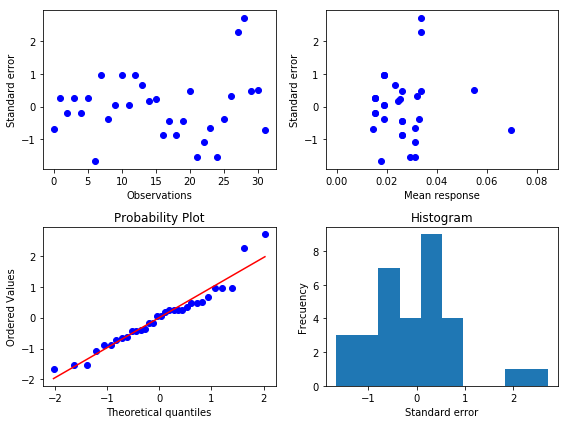

In [9]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df.index, resultado.resid_pearson, color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(resultado.resid_pearson)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()